In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
caltech_dir = "/content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train"
categories = ["man", "woman"]
num_classes = len(categories)

image_w = 128
image_h = 128

pixels = image_h * image_w * 3

X = []
y = []

for idx, category in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(num_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + category
    files = glob.glob(image_dir+"/*.jpg")
    print(category, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(category, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0  이면 man
#0 1  이면 woman 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/gender_data1.npy", xy)

print("ok", len(y))

man  파일 길이 :  774
man  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/man/image_1007.jpg
man  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/man/image_1405.jpg
woman  파일 길이 :  760
woman  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/woman/image_1006.jpg
woman  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/woman/image_931.jpg
ok 1534


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
categories = ["man", "woman"]
num_classes = len(categories)

#일반화
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [16]:
model = Sequential()
model.add(Conv2D(64, 3, strides= 1, activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(64, 3, strides= 1, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(128, 3, strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(256, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(256, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(256, 3, strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(512, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(512, 3, strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 128)      

In [18]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [22]:
history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = 100, 
                    verbose = 1,
                    validation_data=(X_test, y_test))

Epoch 1/100
36/36 [==============================] - 15s 284ms/step - loss: 0.6698 - accuracy: 0.8383 - val_loss: 12.3753 - val_accuracy: 0.5208
Epoch 2/100
36/36 [==============================] - 6s 156ms/step - loss: 1.0264 - accuracy: 0.6713 - val_loss: 2.7541 - val_accuracy: 0.5208
Epoch 3/100
36/36 [==============================] - 5s 153ms/step - loss: 0.8971 - accuracy: 0.6043 - val_loss: 2.0925 - val_accuracy: 0.4974
Epoch 4/100
36/36 [==============================] - 6s 157ms/step - loss: 0.7380 - accuracy: 0.6278 - val_loss: 3.5905 - val_accuracy: 0.4948
Epoch 5/100
36/36 [==============================] - 6s 157ms/step - loss: 0.6789 - accuracy: 0.6791 - val_loss: 0.6438 - val_accuracy: 0.6380
Epoch 6/100
36/36 [==============================] - 5s 152ms/step - loss: 0.6082 - accuracy: 0.7296 - val_loss: 0.6717 - val_accuracy: 0.6328
Epoch 7/100
36/36 [==============================] - 6s 154ms/step - loss: 0.5532 - accuracy: 0.7687 - val_loss: 0.7183 - val_accuracy: 0.60

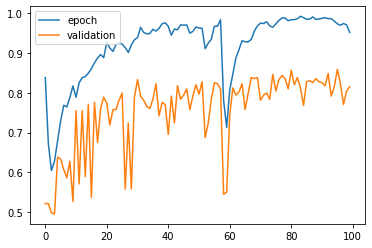

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['epoch', 'validation'], loc = 'upper left')
plt.show()

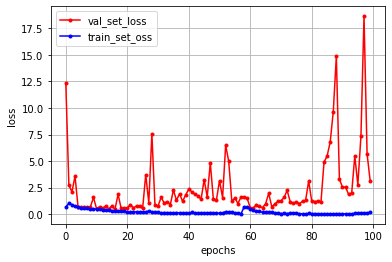

In [24]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()